/var/folders/9z/tc3y_17n39v73g18z3wq5gzc0000gn/T/ipykernel_59261/1879065056.py:38: OptimizeWarning: Covariance of the parameters could not be estimated
  theoretical_params, theoretical_cov = curve_fit(


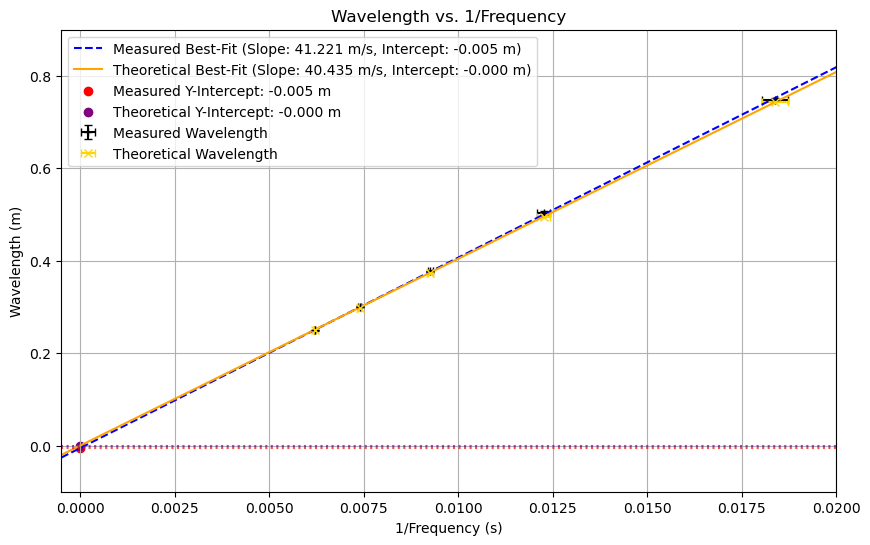

Theoretical Slope: 40.435  m/s
Theoretical Intercept: -0.000  m
Measured Slope: 41.2 ± 0.2 m/s
Measured Intercept: -0.005 ± 0.002 m
Chi-Squared: 4.06
Degrees of Freedom: 3
P-Value: 0.255
Measured Y-Intercept: -0.005 m
Theoretical Y-Intercept: -0.000 m
Calculated Linear Mass Density (mu): 0.0003 kg/m


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

# Constants
g = 9.81  # m/s^2, gravitational acceleration
M = 50 / 1000  # Convert mass from grams to kilograms (0.05 kg)

# Data: Frequencies, node-to-node lengths, and wavelength counts
frequencies = np.array([54.4, 81.6, 108.0, 135.4, 161.2])  # Mean frequencies (Hz)
frequency_uncertainties = np.array([1.02, 1.14, 0.71, 0.55, 0.45])  # RMSD of frequencies

node_to_node_lengths = np.array([37.42, 25.16, 18.84, 15.04, 12.48]) / 100  # Convert cm to meters
length_uncertainties = np.array([0.18, 0.26, 0.04, 0.08, 0.04]) / 100  # Convert cm to meters

# Wavelengths are calculated as (2 * node-to-node length)
wavelengths_measured_m = node_to_node_lengths * 2  # Measured wavelengths in meters
wavelengths_uncertainty_m = length_uncertainties * 2  # Uncertainties for measured wavelengths

# Calculate 1/f and its uncertainty
inv_frequencies = 1 / frequencies  # 1/f in seconds
inv_frequency_uncertainties = (1 / frequencies**2) * frequency_uncertainties

# Define a linear model for fitting
def linear_model(x, slope, intercept):
    return slope * x + intercept

# Fit the measured data
measured_params, measured_cov = curve_fit(
    linear_model, inv_frequencies, wavelengths_measured_m, sigma=wavelengths_uncertainty_m, absolute_sigma=True
)
measured_slope, measured_intercept = measured_params
measured_slope_uncertainty, measured_intercept_uncertainty = np.sqrt(np.diag(measured_cov))

# Calculate theoretical best-fit based on the theoretical relationship
wavelengths_theoretical_m = inv_frequencies * np.sqrt(g * M / mu)  # Theoretical wavelengths in meters
theoretical_params, theoretical_cov = curve_fit(
    linear_model, inv_frequencies, wavelengths_theoretical_m
)
theoretical_slope, theoretical_intercept = theoretical_params
theoretical_slope_uncertainty, theoretical_intercept_uncertainty = np.sqrt(np.diag(theoretical_cov))

# Calculate the linear mass density (mu) and its uncertainty
mu_calculated = g * M / (theoretical_slope**2)
mu_uncertainty = mu_calculated * (2 * theoretical_slope_uncertainty / theoretical_slope)

# Calculate chi-squared for the measured data
chi_squared = np.sum(
    ((wavelengths_measured_m - linear_model(inv_frequencies, *measured_params)) / wavelengths_uncertainty_m) ** 2
)
degrees_of_freedom = len(frequencies) - len(measured_params)
p_value = 1 - chi2.cdf(chi_squared, degrees_of_freedom)

# Calculate the y-intercept visually (at x=0)
x_at_y_intercept = 0
y_intercept_measured = linear_model(x_at_y_intercept, measured_slope, measured_intercept)
y_intercept_theoretical = linear_model(x_at_y_intercept, theoretical_slope, theoretical_intercept)

# Plotting
plt.figure(figsize=(10, 6))

# Plot the measured data with error bars
plt.errorbar(
    inv_frequencies,
    wavelengths_measured_m,
    xerr=inv_frequency_uncertainties,
    yerr=wavelengths_uncertainty_m,
    fmt='+',
    color='black',
    label='Measured Wavelength',
    capsize=3
)

# Plot the theoretical data with error bars (only x-axis uncertainties)
plt.errorbar(
    inv_frequencies,
    wavelengths_theoretical_m,
    xerr=inv_frequency_uncertainties,
    fmt='x',
    color='gold',
    label='Theoretical Wavelength',
    capsize=3
)

# Plot the best-fit lines
x_values = np.linspace(-0.0005, max(inv_frequencies) + 0.01, 100)
plt.plot(
    x_values,
    linear_model(x_values, measured_slope, measured_intercept),
    linestyle='--',
    color='blue',
    label=f'Measured Best-Fit (Slope: {measured_slope:.3f} m/s, Intercept: {measured_intercept:.3f} m)'
)
plt.plot(
    x_values,
    linear_model(x_values, theoretical_slope, theoretical_intercept),
    linestyle='-',
    color='orange',
    label=f'Theoretical Best-Fit (Slope: {theoretical_slope:.3f} m/s, Intercept: {theoretical_intercept:.3f} m)'
)

# Highlight the y-intercept on the plot
plt.scatter([x_at_y_intercept], [y_intercept_measured], color='red', label=f'Measured Y-Intercept: {y_intercept_measured:.3f} m')
plt.axhline(y=y_intercept_measured, color='red', linestyle=':', alpha=0.7)
plt.scatter([x_at_y_intercept], [y_intercept_theoretical], color='purple', label=f'Theoretical Y-Intercept: {y_intercept_theoretical:.3f} m')
plt.axhline(y=y_intercept_theoretical, color='purple', linestyle=':', alpha=0.7)

# Labels and Legend
plt.title('Wavelength vs. 1/Frequency')
plt.xlabel('1/Frequency (s)')
plt.ylabel('Wavelength (m)')
plt.grid(True)
plt.legend()

# Set the axis ranges
plt.xlim(-0.0005, 0.02) 
plt.ylim(-0.1, 0.9)

# Show Plot
plt.show()

# Print Results
print(f"Theoretical Slope: {theoretical_slope:.3f}  m/s")
print(f"Theoretical Intercept: {theoretical_intercept:.3f}  m")
print(f"Measured Slope: {measured_slope:.1f} ± {measured_slope_uncertainty:.1f} m/s")
print(f"Measured Intercept: {measured_intercept:.3f} ± {measured_intercept_uncertainty:.3f} m")
print(f"Chi-Squared: {chi_squared:.2f}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"P-Value: {p_value:.3f}")
print(f"Measured Y-Intercept: {y_intercept_measured:.3f} m")
print(f"Theoretical Y-Intercept: {y_intercept_theoretical:.3f} m")
print(f"Calculated Linear Mass Density (mu): {mu_calculated:.4f} kg/m")

$$\sigma_{\frac{1}{f}} = \left| \frac{\partial \left( \frac{1}{f} \right)}{\partial f} \right| \cdot \sigma_f $$ = $$\sigma_{\frac{1}{f}} = -\frac{1}{f^2} \cdot \sigma_f$$ is the equation I used for uncertainty of 1/f.


$$\chi^2 = \sum_{n=1}^N \frac{(y_i - y(x_i))^2}{\sigma_i^2}$$ is the equation I used for chi-squared.

$$\sigma_{\text{slope}} = \sqrt{\left( \frac{\partial \lambda}{\partial f} \sigma_f \right)^2 + \left( \frac{\partial \lambda}{\partial \lambda} \sigma_{\lambda} \right)^2}$$ is the equation I used for the uncertainty in the slope of the best-fit line.

$$\mu = \frac{g M}{\text{slope}^2}$$ is the equation I used to get the linear mass density.

$$\sigma_{\mu} = \mu \cdot \frac{2 \cdot \sigma_{\text{slope}}}{\text{slope}}$$ is the equation I used for the uncertainty of linear mass density.